<a href="https://colab.research.google.com/github/pranavdevi28/play_store_data_analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mounting the drive               
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing ***Play_Store*** and ***Reviews*** dataset using Pandas

In [ ]:
#importing play store data
play_store_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Play Store App Review Analysis/Play Store Data.csv'
play_store_df = pd.read_csv(play_store_path)

In [ ]:
#importing review data
review_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Play Store App Review Analysis/User Reviews.csv'
review_df = pd.read_csv(review_path)

#Analysing and cleaning ***play_store*** data

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store_df.shape

(10841, 13)

##Checking for duplicate values


In [ ]:
#checking for duplicate values
play_store_df[play_store_df.duplicated()].count()

App               483
Category          483
Rating            474
Reviews           483
Size              483
Installs          483
Type              483
Price             483
Content Rating    483
Genres            483
Last Updated      483
Current Ver       483
Android Ver       483
dtype: int64

In [ ]:
play_store_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
SUDOKU                                               1
Ah! Bird                                             1
EC Calgary                                           1
CX-40                                                1
American Girls Mobile Numbers                        1
Name: App, Length: 9660, dtype: int64

In [ ]:
play_store_df[play_store_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


##Removing duplicates

As we can see, there are few similar app, but those are having different categories. So we will remove the apps which are duplicate in both app and category column as well.

In [ ]:
#removing the duplicate columnns
play_store_df = play_store_df.sort_values('Reviews', ascending=False).drop_duplicates(['App', 'Category']) 

#reseting the index
play_store_df.reset_index(inplace=True)                 

In [ ]:
#All duplicate values with having same app name and category have been removed
play_store_df[play_store_df.duplicated()].count()

index             0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
play_store_df.drop('index', axis=1, inplace=True)

In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9745 entries, 0 to 9744
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9745 non-null   object 
 1   Category        9745 non-null   object 
 2   Rating          8281 non-null   float64
 3   Reviews         9745 non-null   object 
 4   Size            9745 non-null   object 
 5   Installs        9745 non-null   object 
 6   Type            9744 non-null   object 
 7   Price           9745 non-null   object 
 8   Content Rating  9744 non-null   object 
 9   Genres          9745 non-null   object 
 10  Last Updated    9745 non-null   object 
 11  Current Ver     9737 non-null   object 
 12  Android Ver     9742 non-null   object 
dtypes: float64(1), object(12)
memory usage: 989.9+ KB


##Checking and Handling Null values

In [ ]:
play_store_df.isna().sum().sort_values(ascending= False)

Rating            1464
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

There are 5 columns contaiaing null values, amongst which **Current Ver**, **Android Ver**,  are the columns having few number of null values. So we will drop the rows contaiing null value in these 2 columns.

In [ ]:
#Current Ver' & 'Android Ver'
#dropping rows with null values in 'Current Ver' & 'Android Ver' columns

play_store_df.dropna(subset=['Current Ver', 'Android Ver' ], inplace=True)
play_store_df.reset_index(inplace=True, drop=True)

In [ ]:
#Type - Categorical variable
play_store_df['Type'].value_counts()

Free    8978
Paid     755
Name: Type, dtype: int64

As we can see, most of the apps are having type as **Free** and as Type is a **categorical** **variable** we will impute the values with mode of the feature.

In [ ]:
#Imputing Null values with mode for 'Type' column 
play_store_df['Type'].fillna(play_store_df['Type'].mode().values[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


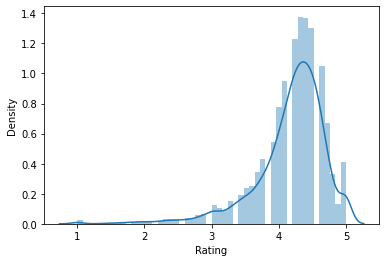

In [ ]:
#Rating - Numerical Column
sns.distplot(play_store_df['Rating'])

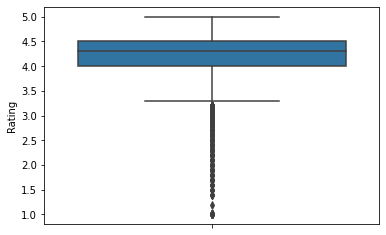

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=play_store_df['Rating'])

From the above chart, all the ratings are between 1.0 to 5.0 and there are no outliers. Looking at the distribution plot, we can conclude that data is negatively skewed. So we will impute the values with median of the feature.

In [ ]:
#Imputing Null values with median for 'Rating' column  
play_store_df['Rating'].fillna(play_store_df['Rating'].median(), inplace=True)

In [ ]:
play_store_df.reset_index(drop=True, inplace=True)

In [ ]:
#Checking if all null values have been removed from the dataset
play_store_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Converting data types

In [ ]:
#finding Categorical columns
for col in play_store_df.columns:
  if len(play_store_df[col].unique())<20:
    print(f'{col}: {list(play_store_df[col].unique())}')

Type: ['Free', 'Paid']
Content Rating: ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']


In [ ]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9734 non-null   object 
 1   Category        9734 non-null   object 
 2   Rating          9734 non-null   float64
 3   Reviews         9734 non-null   object 
 4   Size            9734 non-null   object 
 5   Installs        9734 non-null   object 
 6   Type            9734 non-null   object 
 7   Price           9734 non-null   object 
 8   Content Rating  9734 non-null   object 
 9   Genres          9734 non-null   object 
 10  Last Updated    9734 non-null   object 
 11  Current Ver     9734 non-null   object 
 12  Android Ver     9734 non-null   object 
dtypes: float64(1), object(12)
memory usage: 988.7+ KB


Ideally, **Reviews**, **Size**, **Installs** and **Price** these columns should be numerical columns. 

These columns are having some special characters with numerical values. 
So we need to convert them to numerical columns.

In [ ]:
#Converting 'Reviews' columns to integer
play_store_df['Reviews'] = play_store_df['Reviews'].apply(lambda x: int(x))

In [ ]:
#converting 'Installs' column to integer
play_store_df.loc[play_store_df['Installs']=='Free','Installs']='0'

play_store_df['Installs'] = play_store_df['Installs'].apply(lambda i: int(''.join([i for i in i if i not in (',', '+')])))

For **Size** column, some value are in MegaByte(MB) and some are in KiloByte(KB). So we will maintain same unit throughout the feature by multipling MB values with 1024. Hence, we will have single unit KB for the '**Size**' Column.

There are few apps for which size is mentioned as 'Varies with device', we will replace those values with '0M'.

In [ ]:
play_store_df['Size'] = play_store_df['Size'].replace({'Varies with device':'0M'})

#Coverting 'Size' column to float and maintaing unit KB
sizes=[]

for size in play_store_df['Size']:
  byte=''.join([i for i in size[:-1] if i not in (',','+')])

  if size[-1]=='M':
   sizes.append(float(byte)*1024)

  else:
    sizes.append(float(byte))

play_store_df['Size'] = sizes


In [ ]:
#Converting 'Price' column to float
play_store_df['Price'] = play_store_df['Price'].apply(lambda i: float(''.join([x for x in i if x not in ('$')])))

In [ ]:
play_store_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9734.000000,9.734000e+03,9734.000000,9.734000e+03,9734.000000
mean,4.193815,2.383576e+05,18334.393538,8.215745e+06,1.091498
std,0.495037,1.935456e+06,22132.762131,5.530841e+07,16.787475
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,2.600000e+01,2969.600000,1.000000e+03,0.000000
50%,4.300000,1.020500e+03,9420.800000,1.000000e+05,0.000000
75%,4.500000,3.083850e+04,25600.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


Now we have 5 numerical columns which will be helpful for us in analysing.

In [ ]:
play_store_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9734.000000,9.734000e+03,9734.000000,9.734000e+03,9734.000000
mean,4.193815,2.383576e+05,18334.393538,8.215745e+06,1.091498
std,0.495037,1.935456e+06,22132.762131,5.530841e+07,16.787475
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,2.600000e+01,2969.600000,1.000000e+03,0.000000
50%,4.300000,1.020500e+03,9420.800000,1.000000e+05,0.000000
75%,4.500000,3.083850e+04,25600.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000


#Analysing and cleaning ***Reviews*** data

In [ ]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


##Checking and Handling Null values

In [ ]:
#percentage of Null values
review_df.isnull().sum()/len(review_df)*100

App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64

As there are more than 40% null values in reviews dataset for all cloumns, so we can ignore those rows by dropping them.

In [ ]:
#dropping rows with null values
review_df.dropna(inplace=True)
review_df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
review_df.shape

(37427, 5)

##Extracting data to merge with ***Play_Store*** data

In [ ]:
#creating a dataframe for each unique app
apps = pd.DataFrame(review_df['App'].unique(), columns=['App'])

In [ ]:
#getting counts of all sentimets for all apps

feedback_dict = {'Positive':[], 'Negative':[] , 'Neutral':[]}

for app in apps['App']:
  for sentiment in feedback_dict.keys():
    feedback_dict[sentiment].append(review_df[(review_df['App']==app) & (review_df['Sentiment']==sentiment)]['App'].count())


In [ ]:
#creating dataframe with all sentiments for all apps
feedback = pd.concat([apps,pd.DataFrame(feedback_dict),  ],axis=1)
feedback.head()

,App,Positive,Negative,Neutral
0,10 Best Foods for You,162,10,22
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,1,8
2,11st,23,7,9
3,1800 Contacts - Lens Store,64,6,10
4,1LINE – One Line with One Touch,27,8,3


In [ ]:
#getting average polarity for all sentiment for all apps

feedback_polarity_dict = {'Positive_polarity_avg':[], 'Negative_polarity_avg':[]}

for app in feedback['App']:
  for sentiment_pol in feedback_polarity_dict.keys():

    sentiment = sentiment_pol.split('_')[0]
    total = feedback.loc[feedback.App==app, sentiment].values[0]

    feedback_polarity_dict[sentiment_pol].append(round(review_df[(review_df['App']==app) & (review_df['Sentiment']==sentiment)]['Sentiment_Polarity'].sum()/(total),2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Combining required data from reviews dataset
feedback_df = pd.concat([feedback,pd.DataFrame(feedback_polarity_dict),  ],axis=1)

## Merging both dataset 

We have taken all required columns from reviews data and stored in **feedback_df**.


We will merge the it with play_store data and will create a new dataframe ***final_df*** .


In [ ]:
#creating Final dataset concating the feedback_df and plays_tore_df
final_df = pd.merge(play_store_df, feedback_df, on='App', how='left')

As we have done left join to merge both the datasets, there will be few Null values in resulting dataset where second table does not have matching result.

In [ ]:
#checking Null values in final_df
final_df.isnull().sum()

App                         0
Category                    0
Rating                      0
Reviews                     0
Size                        0
Installs                    0
Type                        0
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 0
Android Ver                 0
Positive                 8886
Negative                 8886
Neutral                  8886
Positive_polarity_avg    8897
Negative_polarity_avg    8962
dtype: int64

There are few apps in play_store dataset, which does not have any reviews in reviews dataset, so we can replace the Null values in final_df with 0.

In [ ]:
#filling the null value with 0 as there are no reviews sentiment for few apps in reviews app
final_df.fillna(0, inplace=True)
final_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Positive,Negative,Neutral,Positive_polarity_avg,Negative_polarity_avg
0,GollerCepte Live Score,SPORTS,4.2,9992,31744.0,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,0.0,0.0,0.0,0.00,0.00
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91.0,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,0.0,0.0,0.0,0.00,0.00
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18432.0,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,0.0,0.0,0.0,0.00,0.00
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33792.0,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,0.0,0.0,0.0,0.00,0.00
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22528.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,21.0,6.0,7.0,0.68,-0.26


In [ ]:
final_df.describe()

,Rating,Reviews,Size,Installs,Price,Positive,Negative,Neutral,Positive_polarity_avg,Negative_polarity_avg
count,9734.000000,9.734000e+03,9734.000000,9.734000e+03,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000,9734.000000
mean,4.193815,2.383576e+05,18334.393538,8.215745e+06,1.091498,2.534621,0.903842,0.516129,0.032846,-0.021725
std,0.495037,1.935456e+06,22132.762131,5.530841e+07,16.787475,11.338110,5.353985,2.422856,0.114918,0.086293
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.100000,2.600000e+01,2969.600000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000,1.020500e+03,9420.800000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000,3.083850e+04,25600.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,209.000000,147.000000,39.000000,1.000000,0.000000
